In [1]:
import numpy as np
import fireducks.pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../kdd2004.csv')

In [3]:
df.target.unique()

array([-1,  1])

In [4]:
df.target = df.target.map({-1:0, 1:1})
df.target.unique()

array([0, 1])

In [5]:
X = df.drop('target', axis=1)
y = df.target

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((102025, 74), (102025,), (43726, 74), (43726,))

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [10]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=0)

In [11]:
lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(X_train, y_train)

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [12]:
y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

In [13]:
y_train_lr = lr.predict_proba(X_train)[:,1]
y_test_lr = lr.predict_proba(X_test)[:,1]

In [14]:
import sklearn.metrics

In [15]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [16]:
from sklearn.metrics import PrecisionRecallDisplay

In [19]:
?PrecisionRecallDisplay.from_estimator

Signature:
PrecisionRecallDisplay.from_estimator(
    estimator,
    X,
    y,
    *,
    sample_weight=None,
    pos_label=None,
    drop_intermediate=False,
    response_method='auto',
    name=None,
    ax=None,
    plot_chance_level=False,
    chance_level_kw=None,
    despine=False,
    **kwargs,
)
Docstring:
Plot precision-recall curve given an estimator and some data.

Parameters
----------
estimator : estimator instance
    Fitted classifier or a fitted :class:`~sklearn.pipeline.Pipeline`
    in which the last estimator is a classifier.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values.

y : array-like of shape (n_samples,)
    Target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

pos_label : int, float, bool or str, default=None
    The class considered as the positive class when computing the
    precision and recall metrics. By default, `estimators.classes_[1]`
    is considered as the positive cl

Text(0.5, 1.0, '2-Class Precision-Recall curve')

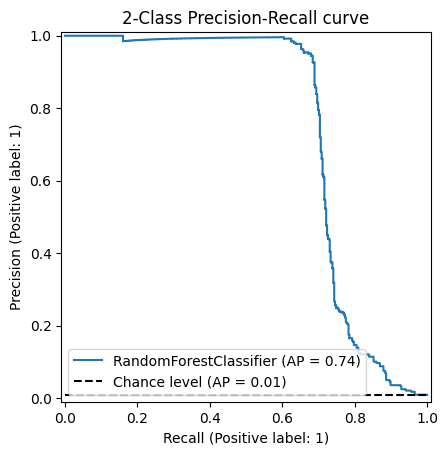

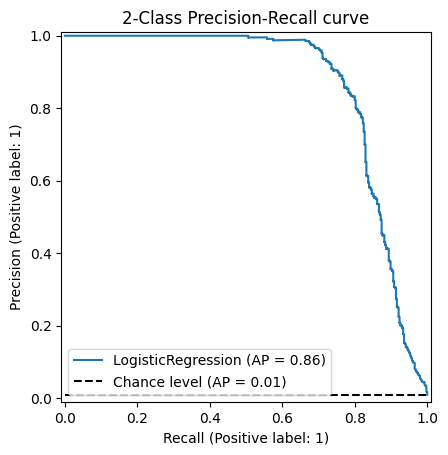

In [23]:
rf_disp = PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, plot_chance_level=True)
rf_disp.ax_.set_title("2-Class Precision-Recall curve")

lr_disp = PrecisionRecallDisplay.from_estimator(lr, X_test, y_test, plot_chance_level=True)
lr_disp.ax_.set_title("2-Class Precision-Recall curve")

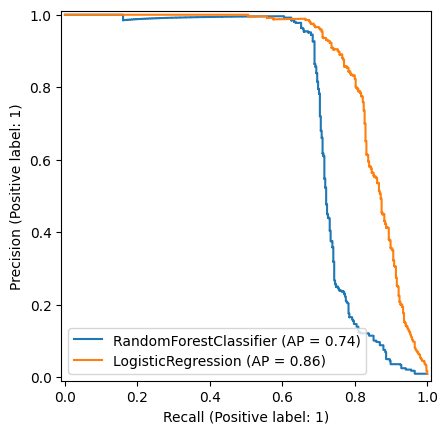

In [25]:
ax = plt.gca()
rf_disp.plot(ax=ax)
lr_disp.plot(ax=ax)

In [26]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [27]:
from sklearn.metrics import precision_recall_curve

In [30]:
from sklearn.metrics import auc

In [33]:
precision, recall, threshold = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])
auc_rf = auc(recall, precision)
print('Area under the PR Curve RF: ', auc_rf)

Area under the PR Curve RF:  0.7401576639740494


In [35]:
precision, recall, threshold = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])
auc_lr = auc(recall, precision)
print('Area under the PR Curve LR: ', auc_lr)

Area under the PR Curve LR:  0.8611325972524583


In [37]:
len(threshold)

43645

In [38]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [39]:
from sklearn.metrics import average_precision_score

In [40]:
?average_precision_score

Signature:
average_precision_score(
    y_true,
    y_score,
    *,
    average='macro',
    pos_label=1,
    sample_weight=None,
)
Docstring:
Compute average precision (AP) from prediction scores.

AP summarizes a precision-recall curve as the weighted mean of precisions
achieved at each threshold, with the increase in recall from the previous
threshold used as the weight:

.. math::
    \text{AP} = \sum_n (R_n - R_{n-1}) P_n

where :math:`P_n` and :math:`R_n` are the precision and recall at the nth
threshold [1]_. This implementation is not interpolated and is different
from computing the area under the precision-recall curve with the
trapezoidal rule, which uses linear interpolation and can be too
optimistic.

Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
    True binary labels or binary label indicators.

y_score : array-like of shape (n_samples,) or (n_samples, n_c

In [42]:
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
print('Average Precision RF: ', ap_rf)

Average Precision RF:  0.7394961041800687


In [44]:
ap_lr = average_precision_score(y_test, lr.predict_proba(X_test)[:,1])
print('Average Precision LR: ', ap_lr)

Average Precision LR:  0.8612044120913399


In [45]:
import yellowbrick.classifier

In [46]:
dir(yellowbrick.classifier)

['ClassBalance',
 'ClassPredictionError',
 'ClassificationReport',
 'ClassificationScoreVisualizer',
 'ConfusionMatrix',
 'DiscriminationThreshold',
 'PRCurve',
 'PrecisionRecallCurve',
 'ROCAUC',
 'ScoreVisualizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'class_balance',
 'class_prediction_error',
 'classification_report',
 'confusion_matrix',
 'discrimination_threshold',
 'prcurve',
 'precision_recall_curve',
 'roc_auc',
 'rocauc',
 'threshold']

In [48]:
from yellowbrick.classifier import PrecisionRecallCurve

In [49]:
?PrecisionRecallCurve

Init signature:
PrecisionRecallCurve(
    estimator,
    ax=None,
    classes=None,
    colors=None,
    cmap=None,
    encoder=None,
    fill_area=True,
    ap_score=True,
    micro=True,
    iso_f1_curves=False,
    iso_f1_values=(0.2, 0.4, 0.6, 0.8),
    per_class=False,
    fill_opacity=0.2,
    line_opacity=0.8,
    is_fitted='auto',
    force_model=False,
    **kwargs,
)
Docstring:     
Precision-Recall curves are a metric used to evaluate a classifier's quality,
particularly when classes are very imbalanced. The precision-recall curve
shows the tradeoff between precision, a measure of result relevancy, and
recall, a measure of completeness. For each class, precision is defined as
the ratio of true positives to the sum of true and false positives, and
recall is the ratio of true positives to the sum of true positives and false
negatives.

A large area under the curve represents both high recall and precision, the
best case scenario for a classifier, showing a model that returns a

In [52]:
plt.rcParams['font.family'] = 'DejaVu Sans'

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


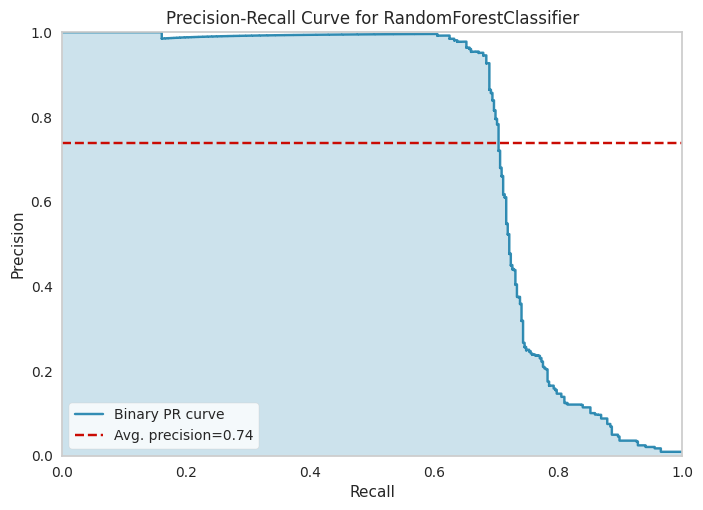

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [53]:
visualizer = PrecisionRecallCurve(rf, classes=[0,1])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


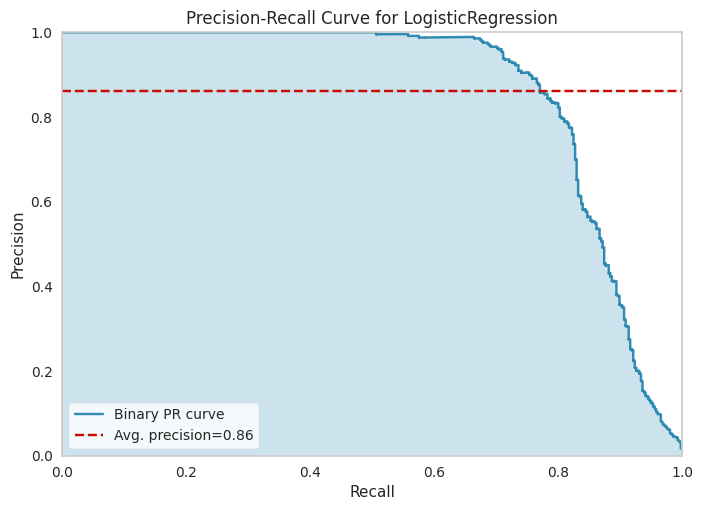

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [54]:
visualizer = PrecisionRecallCurve(lr, classes=[0,1])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()